In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
sys.path.append(r'C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\src')
import os
from GridMetrics import GridScorer, circle_mask, get_even_odd_times, GridParameters, create_new_result_dir, load_grid_metrics_from_pickle
import json
%load_ext autoreload
%autoreload 2

In [2]:
halves_directory = r'Z:/grid-orientation-project'
figure_directory = r'C:/Users/acostamendoza/Box/grid-cell-project/sup-length-chunk'

In [5]:
def detect_none_trials(cell_trial_dict):
    number_of_none_trials = []
    is_accepted = []
    for cell in cell_trial_dict:
        none_trials = 0
        for trial in cell_trial_dict[cell]:
            if cell_trial_dict[cell][trial]['spacing_odd'] is None:
                none_trials += 1
                
        if none_trials == 0:
            is_accepted.append(True)
        else:
            is_accepted.append(False)
            
        number_of_none_trials.append(none_trials)
    return number_of_none_trials, is_accepted

def compute_prctg_good_cells(cell_trial_dict):
    number_of_none_trials, is_accepted = detect_none_trials(cell_trial_dict)
    good_cells = 0
    for none_trials in number_of_none_trials:
        if none_trials < 3:
            good_cells += 1
    good_cells_prctg = good_cells/len(G.orientation)
    
    return 100*good_cells_prctg

In [16]:
rats = ['q', 'q', 'r1', 'r1', 'r1', 'r2', 'r2', 'r2', 's']
mods = ['1', '2', '1', '2', '3', '1', '2', '3', '1']
length_names = ['1s', '2s', '4s', '8s', '16s', '32s', '64s']
accepted_dict = {}

for rat, mod in zip(rats, mods):
    G, _, _ = load_grid_metrics_from_pickle(rat, mod)
    baseline_accepted = len(G.orientation) - G.orientation.count(None)
    accepted_dict[rat + mod] = [100]
    for name in length_names:
        with open(halves_directory + '/' + rat + mod + '/' + rat + mod + '_odds-even-no-rejection' + name + '.json') as f:
            cell_trial_dict = json.load(f)
            
        _, is_accepted = detect_none_trials(cell_trial_dict)
        good_cells = 100 * (np.sum(is_accepted)/baseline_accepted )
        accepted_dict[rat + mod].append(good_cells)

Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\q1 already exists
73
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\q2 already exists
43
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r11 already exists
103
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r12 already exists
103
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r13 already exists
27
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r21 already exists
140
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r22 already exists
123
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r23 already exists
3
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\s1 already exists
91


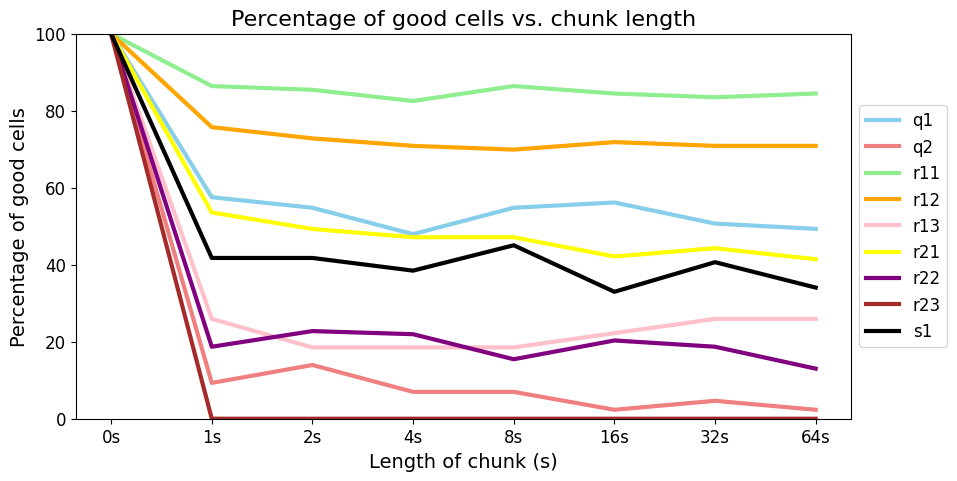

In [18]:
plt.figure(figsize=(10, 5))
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'pink', 'yellow', 'purple', 'brown', 'black']

for rat_mod in accepted_dict:
    plt.plot(accepted_dict[rat_mod], linewidth=3, label = rat_mod, color = colors[list(accepted_dict.keys()).index(rat_mod)])

length_names = ['0s', '1s', '2s', '4s', '8s', '16s', '32s', '64s']
plt.xlabel('Length of chunk (s)', fontsize = 14)
plt.ylabel('Percentage of good cells', fontsize = 14)
plt.legend()
plt.ylim([0, 100])
plt.xticks(np.arange(8), length_names)
plt.title('Percentage of good cells vs. chunk length', fontsize = 16)
# set fontsize of ticks to 12
plt.tick_params(axis='both', which='major', labelsize=12)
# set legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.savefig(figure_directory + '/' + 'good_cells_vs_chunk_length.svg', dpi=1200)
plt.savefig(figure_directory + '/' + 'good_cells_vs_chunk_length.png', dpi=1200)

In [13]:
accepted_dict

{'q1': [0.7525773195876289,
  0.4329896907216495,
  0.41237113402061853,
  0.36082474226804123,
  0.41237113402061853,
  0.422680412371134,
  0.38144329896907214,
  0.3711340206185567],
 'q2': [0.6515151515151515,
  0.06060606060606061,
  0.09090909090909091,
  0.045454545454545456,
  0.045454545454545456,
  0.015151515151515152,
  0.030303030303030304,
  0.015151515151515152],
 'r11': [0.6204819277108434,
  0.536144578313253,
  0.5301204819277109,
  0.5120481927710844,
  0.536144578313253,
  0.5240963855421686,
  0.5180722891566265,
  0.5240963855421686],
 'r12': [0.6130952380952381,
  0.4642857142857143,
  0.44642857142857145,
  0.43452380952380953,
  0.42857142857142855,
  0.44047619047619047,
  0.43452380952380953,
  0.43452380952380953],
 'r13': [0.18120805369127516,
  0.04697986577181208,
  0.03355704697986577,
  0.03355704697986577,
  0.03355704697986577,
  0.040268456375838924,
  0.04697986577181208,
  0.04697986577181208],
 'r21': [0.7407407407407407,
  0.3968253968253968,
  0

In [7]:
def detect_none_trials(cell_trial_dict):
    number_of_none_trials = []
    is_accepted = []
    for cell in cell_trial_dict:
        none_trials = 0
        for trial in cell_trial_dict[cell]:
            if cell_trial_dict[cell][trial]['spacing_odd'] is None:
                none_trials += 1
                
        if none_trials < 5:
            is_accepted.append(True)
        else:
            is_accepted.append(False)
            
        number_of_none_trials.append(none_trials)
        
    return number_of_none_trials, is_accepted

def compute_prctg_good_cells(G, cell_trial_dict):
    
    number_of_none_trials, is_accepted = detect_none_trials(cell_trial_dict)
    good_cells = 0
    for none_trials in number_of_none_trials:
        if none_trials < 5:
            good_cells += 1
    good_cells_prctg = good_cells/len(G.orientation)
    
    return 100*good_cells_prctg

In [31]:
print(compute_prctg_good_cells(cell_trial_dicts[0]))

Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\q1 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\q2 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r11 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r12 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r13 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r21 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r22 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\r23 already exists
Directory C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\results\s1 already exists


0
1
2
3
4
5
6
7
8


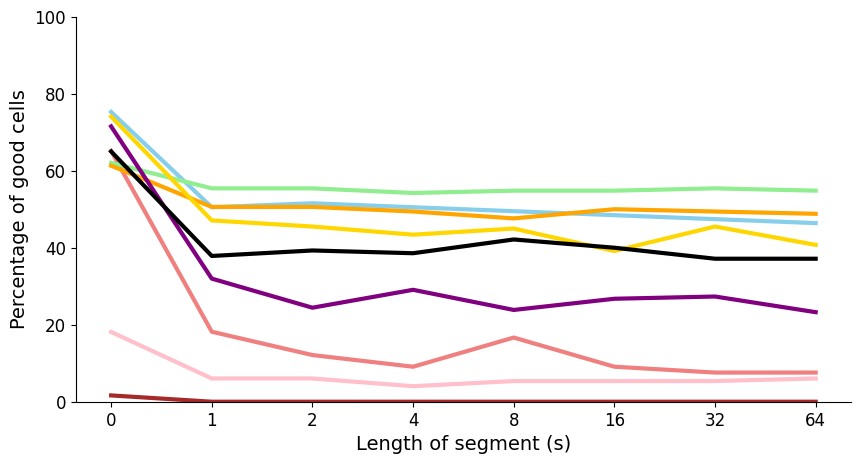

In [39]:
fig_directory = r'C:\Users\acostamendoza\Box\grid-cell-project\sup-length-chunk'

# Method computing odds and evens

1. **Selection of time chunks** : We divide the recording into chunks according to how many seconds we want the chunks to be. In this recording, the sampling rate of spatial variables (x,y) and spikes is 10ms, so if we want 10s chunks we will be having chunks of length 10*100 = 1000 bins
2. **Assignation of the number of odds and evens chunks** : We compute, given the size of the chunks, how many odds and even the session will have (the recording is 120 minutes, so 10s chunks will end up being 360 odd chunks and 360 even chunks). Then, we randomly assign to each chunk an odd or even identity
3. **Computation of odd and even SAC**: For a given trial, the odd times are extracted so that we can have all the spatial coordinates and spikes given those times. With those, we recompute the spatial maps and SAC to extract orientation and spacing.

We do this method 100 times for each cell, giving us the odd and evens spacing, orientation and grid score. If **any** of the odds and even splits of any given trial fails to meet orientation and spacing criteria set before, then the whole cell is not considered for further analysis.

[61.30952380952381]
49.404761904761905
50.0
48.214285714285715
50.595238095238095
49.404761904761905
49.404761904761905
48.80952380952381
48.80952380952381


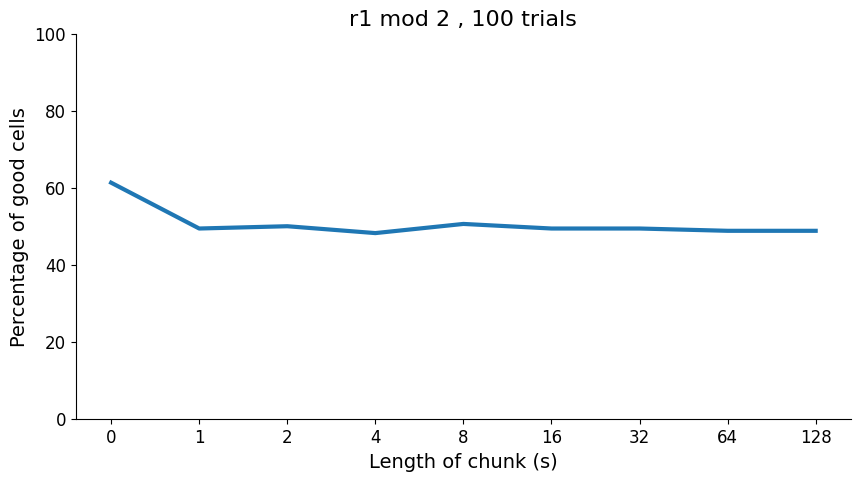

<Figure size 640x480 with 0 Axes>

In [8]:
good_cells = []
good_cells.append(100*(len(G.orientation) - G.orientation.count(None))/len(G.orientation))

for i, name in enumerate(names):
    good_cells.append(compute_prctg_good_cells(cell_trial_dicts[i]))

names_plot = ['0', '1', '2', '4', '8', '16', '32', '64', '128']

plt.figure(figsize=(10, 5))
ax = plt.gca()
plt.xlabel('Length of chunk (s)', fontsize = 14)
plt.ylabel('Percentage of good cells', fontsize = 14)
plt.ylim([0, 100])
plt.plot(good_cells, linewidth=3)
plt.xticks(np.arange(9), names_plot)
# set fontsize of ticks to 12
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(rat + ' mod ' + mod + ' , 100 trials', fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig(fig_directory + '/' + rat + mod + '_good_cells_vs_chunk_length.png', dpi=1200)

In [ ]:
# Figure 2A: Orientation and spacing distribution

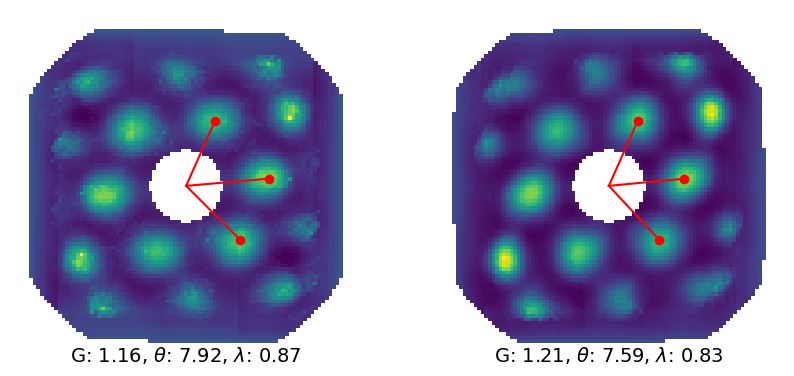

In [154]:
cell = 65
valid_times = get_even_odd_times(length_of_recording = len(G.x), seconds_per_bin = 1000)

sac_odd, sac_even = G.get_odd_and_even_sacs(cell, valid_times)

G.show_odd_even_orientation_and_spacing(sac_odd, sac_even)

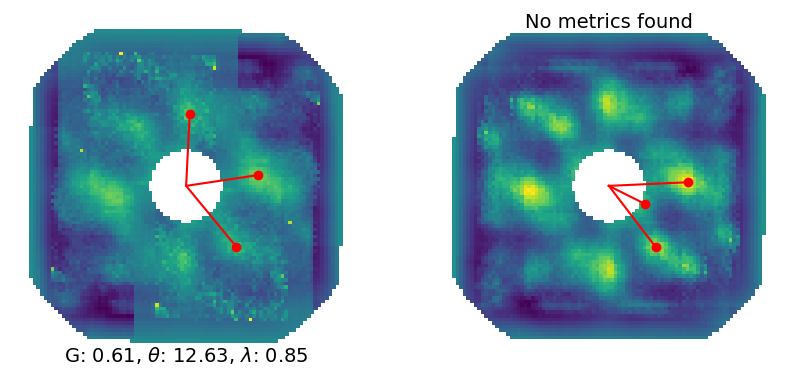

In [153]:
cell = 3
valid_times = get_even_odd_times(length_of_recording = len(G.x), seconds_per_bin = 0.5)
sac_odd, sac_even = G.get_odd_and_even_sacs(cell, valid_times)
G.show_odd_even_orientation_and_spacing(sac_odd, sac_even)

# Figure 2B-middle: Odds vs evens distribution

In [93]:
def make_odds_even_distribution(cell_trial_dict, type):

    delta_orientation_single_cell = []
    delta_orientation_two_cells = []
    delta_spacing_single_cell = []
    delta_spacing_two_cells = []
    
    for cell in cell_trial_dict:
        for trial in cell_trial_dict[cell]:
            delta_orientation_single_cell.append(cell_trial_dict[cell][trial]['orientation_even'] - cell_trial_dict[cell][trial]['orientation_odd'])
            second_cell = random.choice(list(cell_trial_dict.keys()))
            delta_orientation_two_cells.append(cell_trial_dict[cell][trial]['orientation_even'] - cell_trial_dict[second_cell][trial]['orientation_odd'])
            delta_spacing_single_cell.append(cell_trial_dict[cell][trial]['spacing_even'] - cell_trial_dict[cell][trial]['spacing_odd'])
            delta_spacing_two_cells.append(cell_trial_dict[cell][trial]['spacing_even'] - cell_trial_dict[second_cell][trial]['spacing_odd'])
            
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    plt.suptitle('Odds vs. Evens Distribution, rat ' + rat + ' mod ' + mod + ' , ' + type, fontsize = 16)
    
    # Plot histogram for the original data
    axes[0].hist(delta_orientation_single_cell, bins=np.linspace(-7.5, 7.5, 50), density = True, alpha = 0.75)
    axes[0].hist(delta_orientation_two_cells, bins=np.linspace(-7.5, 7.5, 50), density = True, alpha = 0.5)
    axes[0].set_xlabel(r'$\Delta\theta$ (degrees)')
    axes[0].set_ylabel('Density')
    axes[0].legend([r'$\Delta\theta_{between}$', r'$\Delta\theta_{within}$'])
    axes[0].set_xlim(-7.5, 7.5)
    
    # Plot histogram for the filtered data (excluding None entries)
    axes[1].hist(delta_spacing_single_cell, bins=np.linspace(-.3, .3, 50), density = True, alpha = 0.75)
    axes[1].hist(delta_spacing_two_cells, bins=np.linspace(-.3, .3, 50), density = True, alpha = 0.5)
    axes[1].set_xlabel(r'$\Delta\lambda$ (cm)')
    axes[1].set_ylabel('Density')
    axes[1].legend([r'$\Delta\lambda_{between}$', r'$\Delta\lambda_{within}$'])
    
    # set all labels to fontsize 14
    for ax in axes:
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.xaxis.label.set_size(14)
        ax.yaxis.label.set_size(14)
        
    # Adjust spacing between subplots
    plt.tight_layout()
    
    plt.savefig(session_results_directory + '/' + rat + mod + '_' + type + '_2B_odds_even_distribution.png', dpi=300)

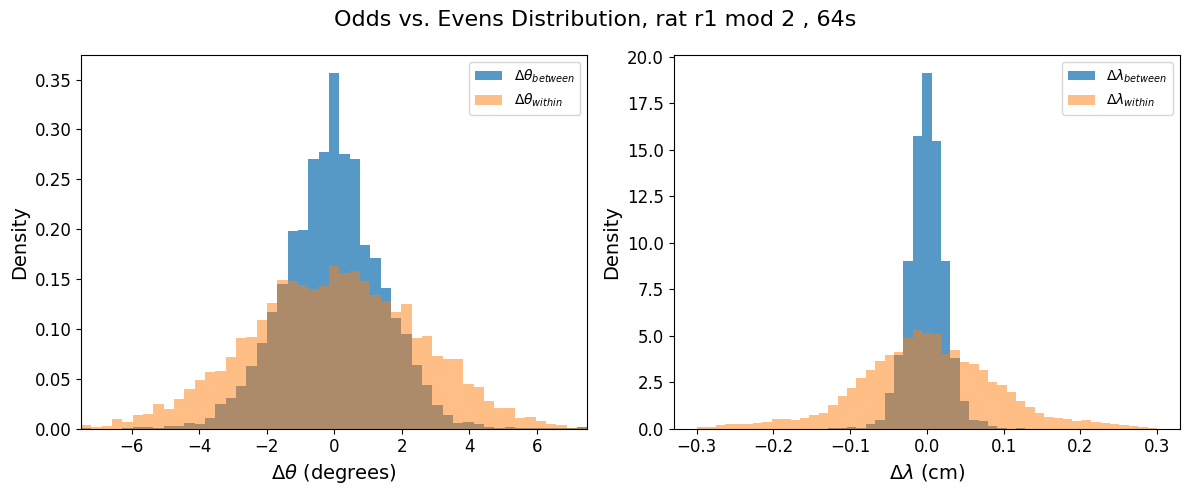

In [95]:
make_odds_even_distribution(cell_trial_dict, '64s')
plt.savefig(fig_directory + '/' + 'A_odds_even_distribution.png', dpi=1200)

# Figure 2B-Right: Odds vs evens colorplot

In [12]:
# get all even orientations from cell_trial_dict and all odd orientations
def make_odds_even_colorplot_orientation(cell_trial_dict, type):
    
    even_orientations = []
    odd_orientations = []
    
    for cell in cell_trial_dict:
        for trial in cell_trial_dict[cell]:
            even_orientations.append(cell_trial_dict[cell][trial]['orientation_even'])
            odd_orientations.append(cell_trial_dict[cell][trial]['orientation_odd'])
            
    even_orientations = np.array(even_orientations)
    odd_orientations = np.array(odd_orientations)
    
    # order the even and odd orientations by the even orientations
    orientation_ordering = np.argsort(even_orientations)
    even_orientations = even_orientations[orientation_ordering]
    odd_orientations = odd_orientations[orientation_ordering]
    # concatenate the even and odd orientations such that the first column is the even orientations and the second column is the odd orientations
    even_odd_orientations = np.concatenate((even_orientations.reshape(-1, 1), odd_orientations.reshape(-1, 1)), axis=1)
    
    # make a pcolor plot of the even and odd orientations
    plt.figure(figsize=(4, 8))
    plt.pcolor(even_odd_orientations)
    
    # have the x-axis to have just two labels: odss and even
    plt.xticks([0.5, 1.5], ['Odds', 'Evens'])
    # remove y axis
    plt.yticks([])
    plt.title('Evens ordered according to odds, ' + type, fontsize = 16)
    plt.ylabel('Trial', fontsize = 14)
    # set fontisizes of axis to be 14
    plt.tick_params(axis='both', which='major', labelsize=14)


In [92]:
def make_odds_even_colorplot(cell_trial_dict, type):
    
    even_spacings = []
    odd_spacings = []
    
    odd_orientations = []
    even_orientations = []
    
    for cell in cell_trial_dict:
        for trial in cell_trial_dict[cell]:
            even_spacings.append(cell_trial_dict[cell][trial]['spacing_even'])
            odd_spacings.append(cell_trial_dict[cell][trial]['spacing_odd'])
            odd_orientations.append(cell_trial_dict[cell][trial]['orientation_odd'])
            even_orientations.append(cell_trial_dict[cell][trial]['orientation_even'])
            
    even_spacings = np.array(even_spacings)
    odd_spacings = np.array(odd_spacings)
    even_orientations = np.array(even_orientations)
    odd_orientations = np.array(odd_orientations)
    
    
    # order the even and odd orientations by the even orientations
    orientations_ordering = np.argsort(even_orientations)
    even_orientations = even_orientations[orientations_ordering]
    odd_orientations = odd_orientations[orientations_ordering]
    # concatenate the even and odd orientations such that the first column is the even orientations and the second column is the odd orientations
    even_odd_orientations = np.concatenate((even_orientations.reshape(-1, 1), odd_orientations.reshape(-1, 1)), axis=1)
    
    # order the even and odd spacings by the even spacings
    spacings_ordering = np.argsort(even_spacings)
    even_spacings = even_spacings[spacings_ordering]
    odd_spacings = odd_spacings[spacings_ordering]
    # concatenate the even and odd spacings such that the first column is the even spacings and the second column is the odd spacings
    even_odd_spacings = np.concatenate((even_spacings.reshape(-1, 1), odd_spacings.reshape(-1, 1)), axis=1)
    
    # make a pcolor plot of the even and odd orientations
    fig, axes = plt.subplots(1, 2, figsize=(8, 8))
    fig.suptitle('Evens ordered according to odds, ' + type, fontsize = 20)
    # add spacing between plots
    plt.subplots_adjust(wspace=0.3)
    
    axes[0].pcolor(even_odd_orientations, vmin = np.percentile(even_odd_orientations, 1), vmax = np.percentile(even_odd_orientations, 99))
    axes[0].set_title('Orientation', fontsize = 16)
    axes[1].pcolor(even_odd_spacings, vmin = np.percentile(even_odd_spacings, 1), vmax = np.percentile(even_odd_spacings, 99))
    axes[1].set_title('Spacing', fontsize = 16)
    
    # have the x-axis to have just two labels: odss and even
    for ax in axes:
        ax.set_xticks([0.5, 1.5], ['Odds', 'Evens'], fontsize = 14)
    # remove y axis
    #     ax.set_yticks([])
        ax.tick_params(axis='both', which='major', labelsize=14)
        
    

In [ ]:
make_odds_even_colorplot(cell_trial_dicts[-1], names[-1])

# 2C: Scatter plot of every cell

In [90]:
def make_scatter_plot_differences(cell_trial_dict, type):
    
    delta_orientation_single_cell_mean = []
    delta_orientation_two_cells_mean = []
    delta_spacing_single_cell_mean = []
    delta_spacing_two_cells_mean = []
    
    for cell in cell_trial_dict:
        delta_orientation_single_cell = []
        delta_orientation_two_cells = []
        delta_spacing_single_cell = []
        delta_spacing_two_cells = []
        for trial in cell_trial_dict[cell]:
            delta_orientation_single_cell.append(abs(cell_trial_dict[cell][trial]['orientation_even'] - cell_trial_dict[cell][trial]['orientation_odd']))
            second_cell = random.choice(list(cell_trial_dict.keys()))
            delta_orientation_two_cells.append(abs(cell_trial_dict[cell][trial]['orientation_even'] - cell_trial_dict[second_cell][trial]['orientation_odd']))
            delta_spacing_single_cell.append(abs(cell_trial_dict[cell][trial]['spacing_even'] - cell_trial_dict[cell][trial]['spacing_odd']))
            delta_spacing_two_cells.append(abs(cell_trial_dict[cell][trial]['spacing_even'] - cell_trial_dict[second_cell][trial]['spacing_odd']))
            
        delta_orientation_single_cell_mean.append(np.mean(delta_orientation_single_cell))
        delta_orientation_two_cells_mean.append(np.mean(delta_orientation_two_cells))
        delta_spacing_single_cell_mean.append(100 * np.mean(delta_spacing_single_cell))
        delta_spacing_two_cells_mean.append(100 * np.mean(delta_spacing_two_cells))
    
    # convert all four variables to arrays
    delta_orientation_single_cell_mean = np.array(delta_orientation_single_cell_mean)
    delta_orientation_two_cells_mean = np.array(delta_orientation_two_cells_mean)
    delta_spacing_single_cell_mean = np.array(delta_spacing_single_cell_mean)
    delta_spacing_two_cells_mean = np.array(delta_spacing_two_cells_mean)
    
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3)
    plt.suptitle('Odds vs. Evens Distribution, rat ' + rat + ' mod ' + mod + ' , ' + type, fontsize = 16)
    
    # plot scatter plot of orientation
    axes[0].scatter(delta_orientation_single_cell_mean, delta_orientation_two_cells_mean, color='skyblue', edgecolor='black')
    axes[0].set_xlabel(r'$\overline{\Delta\theta}_{within}$ (degrees)')
    axes[0].set_ylabel(r'$\overline{\Delta\theta}_{between}$ (degrees)')
    axes[0].set_xlim(0, 4)
    axes[0].set_ylim(0, 4)
    # plot a diagonal line
    axes[0].plot([0, 4], [0, 4], color='black')
    
    # plot scatter plot of spacing
    axes[1].scatter(delta_spacing_single_cell_mean, delta_spacing_two_cells_mean, color='lightcoral', edgecolor='black')
    axes[1].set_xlabel(r'$\overline{\Delta\lambda}_{within}$ (cm)')
    axes[1].set_ylabel(r'$\overline{\Delta\lambda}_{between}$ (cm)')
    axes[1].set_xlim(0, 13)
    axes[1].set_ylim(0, 13)
    # plot a diagonal line
    axes[1].plot([0, 13], [0, 13], color='black')
    
    # set all labels to fontsize 14
    for ax in axes:
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.xaxis.label.set_size(14)
        ax.yaxis.label.set_size(14)

In [59]:
def compute_prctg_above_line(cell_trial_dict):
    
    delta_orientation_single_cell_mean = []
    delta_orientation_two_cells_mean = []
    delta_spacing_single_cell_mean = []
    delta_spacing_two_cells_mean = []
    
    for cell in cell_trial_dict:
        delta_orientation_single_cell = []
        delta_orientation_two_cells = []
        delta_spacing_single_cell = []
        delta_spacing_two_cells = []
        for trial in cell_trial_dict[cell]:
            delta_orientation_single_cell.append(abs(cell_trial_dict[cell][trial]['orientation_even'] - cell_trial_dict[cell][trial]['orientation_odd']))
            second_cell = random.choice(list(cell_trial_dict.keys()))
            delta_orientation_two_cells.append(abs(cell_trial_dict[cell][trial]['orientation_even'] - cell_trial_dict[second_cell][trial]['orientation_odd']))
            delta_spacing_single_cell.append(abs(cell_trial_dict[cell][trial]['spacing_even'] - cell_trial_dict[cell][trial]['spacing_odd']))
            delta_spacing_two_cells.append(abs(cell_trial_dict[cell][trial]['spacing_even'] - cell_trial_dict[second_cell][trial]['spacing_odd']))
            
        delta_orientation_single_cell_mean.append(np.mean(delta_orientation_single_cell))
        delta_orientation_two_cells_mean.append(np.mean(delta_orientation_two_cells))
        delta_spacing_single_cell_mean.append(np.mean(delta_spacing_single_cell))
        delta_spacing_two_cells_mean.append(np.mean(delta_spacing_two_cells))
    
    # convert all four variables to arrays
    delta_orientation_single_cell_mean = np.array(delta_orientation_single_cell_mean)
    delta_orientation_two_cells_mean = np.array(delta_orientation_two_cells_mean)
    delta_spacing_single_cell_mean = np.array(delta_spacing_single_cell_mean)
    delta_spacing_two_cells_mean = np.array(delta_spacing_two_cells_mean)
    
    # element by element, compute how many delta_orientation_two_cells_mean is higher than delta_orientation_single_cell_mean
    orientation_above_line = np.sum(delta_orientation_two_cells_mean > delta_orientation_single_cell_mean)/ len(delta_orientation_two_cells_mean)
    spacing_above_line = np.sum(delta_spacing_two_cells_mean > delta_spacing_single_cell_mean)/ len(delta_spacing_two_cells_mean)
    
    return 100*orientation_above_line, 100*spacing_above_line
    

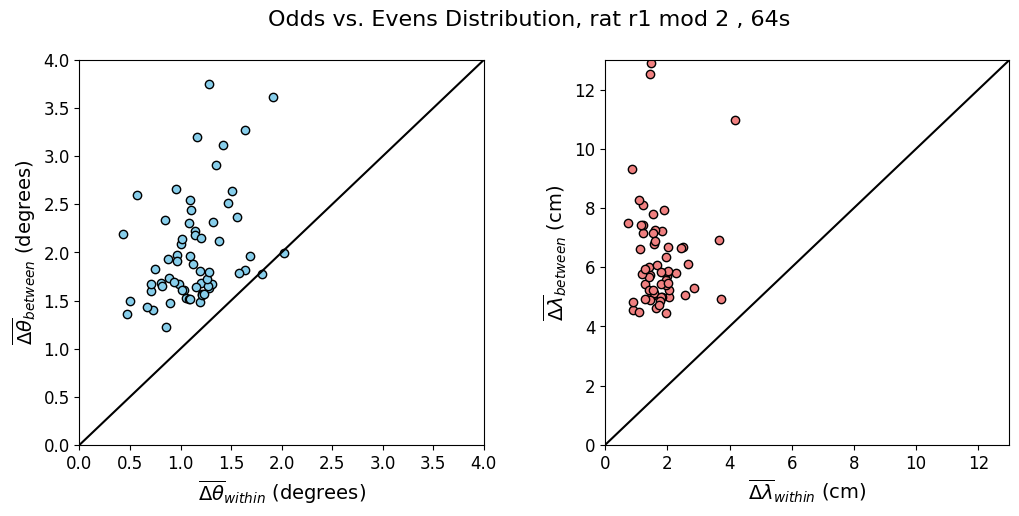

In [92]:
make_scatter_plot_differences(cell_trial_dict, '64s')
plt.savefig(fig_directory + '/' + 'B_scatter_plot_differences.png', dpi=1200)

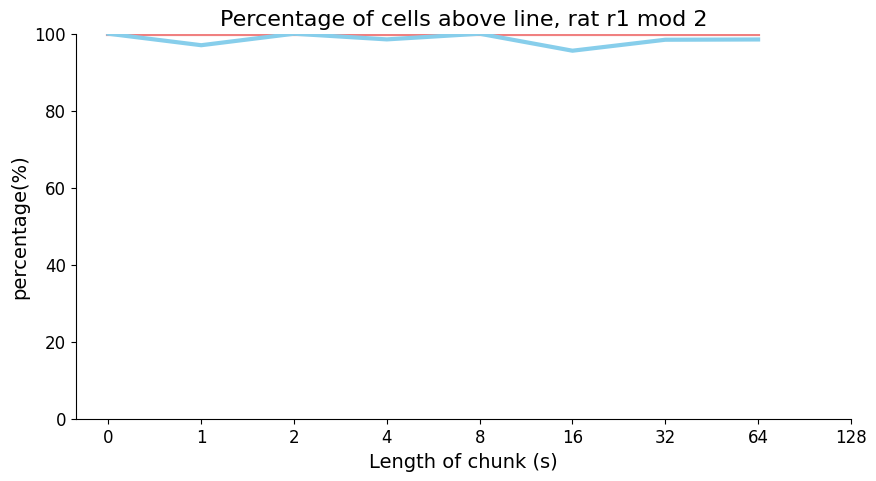

In [129]:
above_line_orientation = []
above_line_spacing = []

for name in names:
    above_line_spacing.append(compute_prctg_above_line(cell_trial_dicts[names.index(name)])[1])
    above_line_orientation.append(compute_prctg_above_line(cell_trial_dicts[names.index(name)])[0])
    
plt.figure(figsize=(10, 5))
ax = plt.gca()
plt.xlabel('Length of chunk (s)', fontsize = 14)
plt.ylabel('percentage(%)', fontsize = 14)
plt.plot(above_line_spacing, linewidth=3, color = 'lightcoral')
plt.plot(above_line_orientation, linewidth=3, color = 'skyblue')
# ylim
plt.ylim(0, 100)
plt.xticks(np.arange(9), names_plot)
# set fontsize of ticks to 12
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Percentage of cells above line, rat ' + rat + ' mod ' + mod, fontsize = 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# Figure 2C: variance vs grid score

In [16]:
G.grid_scores[cell]

TypeError: list indices must be integers or slices, not str

In [19]:
delta_orientation_single_cell_mean = []
delta_orientation_two_cells_mean = []
delta_spacing_single_cell_mean = []
delta_spacing_two_cells_mean = []
grid_score = []
    
for cell in cell_trial_dict:
    grid_score.append(G.grid_scores[int(cell)])
    
    delta_orientation_single_cell = []
    delta_orientation_two_cells = []
    delta_spacing_single_cell = []
    delta_spacing_two_cells = []
    for trial in cell_trial_dict[cell]:
        delta_orientation_single_cell.append(abs(cell_trial_dict[cell][trial]['orientation_even'] - cell_trial_dict[cell][trial]['orientation_odd']))
        second_cell = random.choice(list(cell_trial_dict.keys()))
        delta_orientation_two_cells.append(abs(cell_trial_dict[cell][trial]['orientation_even'] - cell_trial_dict[second_cell][trial]['orientation_odd']))
        delta_spacing_single_cell.append(abs(cell_trial_dict[cell][trial]['spacing_even'] - cell_trial_dict[cell][trial]['spacing_odd']))
        delta_spacing_two_cells.append(abs(cell_trial_dict[cell][trial]['spacing_even'] - cell_trial_dict[second_cell][trial]['spacing_odd']))
        
    delta_orientation_single_cell_mean.append(np.mean(delta_orientation_single_cell))
    delta_orientation_two_cells_mean.append(np.mean(delta_orientation_two_cells))
    delta_spacing_single_cell_mean.append(np.mean(delta_spacing_single_cell))
    delta_spacing_two_cells_mean.append(np.mean(delta_spacing_two_cells))
    
# convert all four variables to arrays
delta_orientation_single_cell_mean = np.array(delta_orientation_single_cell_mean)
delta_orientation_two_cells_mean = np.array(delta_orientation_two_cells_mean)
delta_spacing_single_cell_mean = np.array(delta_spacing_single_cell_mean)
delta_spacing_two_cells_mean = np.array(delta_spacing_two_cells_mean)
grid_score = np.array(grid_score)

In [35]:
# plot the std deviation in orienation and spacing vs the grid score of every binb
bins = np.linspace(0.6, 1.2, 7)
digitized = np.digitize(grid_score, bins)

bin_within_orientation = []
bin_between_orientation = []

bin_within_spacing = []
bin_between_spacing = []

for i in range(0, len(bins)):
    
    bin_within_orientation.append(delta_orientation_single_cell_mean[digitized == i].mean())
    bin_between_orientation.append(delta_orientation_two_cells_mean[digitized == i].mean())
    
    bin_within_spacing.append(delta_spacing_single_cell_mean[digitized == i].mean())
    bin_between_spacing.append(delta_spacing_two_cells_mean[digitized == i].mean())
    

C:\Users\acostamendoza\AppData\Local\Temp\ipykernel_12528\2188860673.py:13: RuntimeWarning: Mean of empty slice.
  bin_within_orientation.append(delta_orientation_single_cell_mean[digitized == i].mean())
C:\Users\acostamendoza\AppData\Local\Temp\ipykernel_12528\2188860673.py:14: RuntimeWarning: Mean of empty slice.
  bin_between_orientation.append(delta_orientation_two_cells_mean[digitized == i].mean())
C:\Users\acostamendoza\AppData\Local\Temp\ipykernel_12528\2188860673.py:16: RuntimeWarning: Mean of empty slice.
  bin_within_spacing.append(delta_spacing_single_cell_mean[digitized == i].mean())
C:\Users\acostamendoza\AppData\Local\Temp\ipykernel_12528\2188860673.py:17: RuntimeWarning: Mean of empty slice.
  bin_between_spacing.append(delta_spacing_two_cells_mean[digitized == i].mean())


[nan, nan, 1.2985149723092062, 1.34248207838802, 0.9901789472523934, 1.18582964525536, 1.0774624437015958]


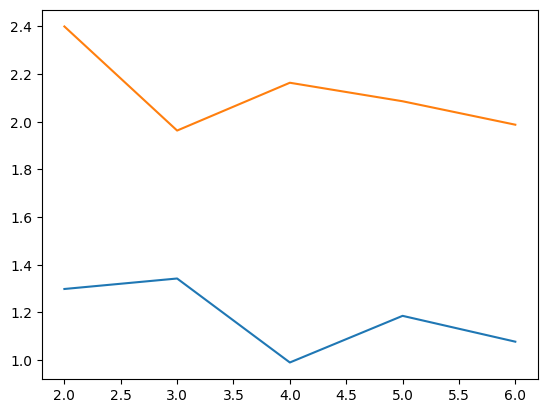

C:\Users\acostamendoza\AppData\Local\Temp\ipykernel_12528\1968672543.py:18: RuntimeWarning: Mean of empty slice.
  bin_within_orientation.append(delta_orientation_single_cell_mean[digitized == i].mean())
C:\Users\acostamendoza\AppData\Local\Temp\ipykernel_12528\1968672543.py:19: RuntimeWarning: Mean of empty slice.
  bin_between_orientation.append(delta_orientation_two_cells_mean[digitized == i].mean())
C:\Users\acostamendoza\AppData\Local\Temp\ipykernel_12528\1968672543.py:21: RuntimeWarning: Mean of empty slice.
  bin_within_spacing.append(100 * delta_spacing_single_cell_mean[digitized == i].mean())
C:\Users\acostamendoza\AppData\Local\Temp\ipykernel_12528\1968672543.py:22: RuntimeWarning: Mean of empty slice.
  bin_between_spacing.append(100 * delta_spacing_two_cells_mean[digitized == i].mean())


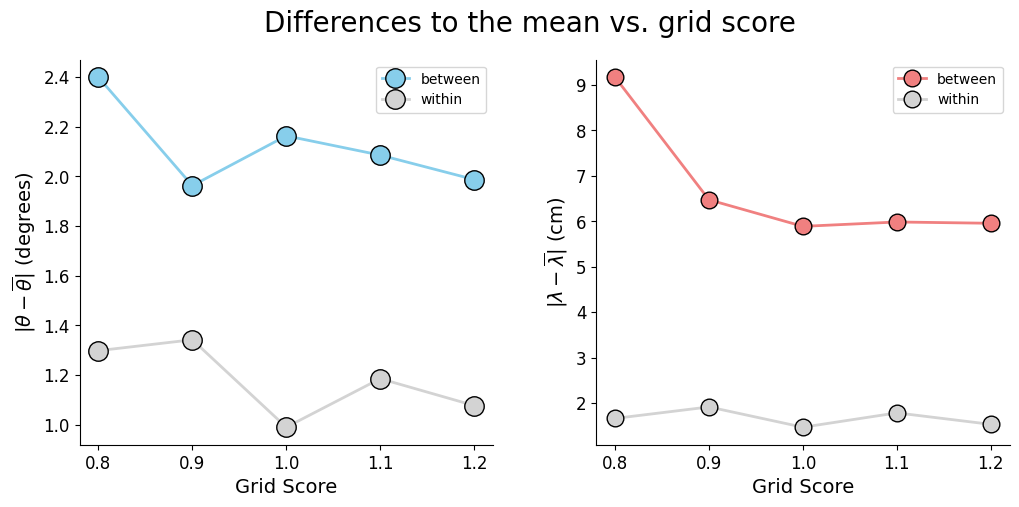

In [97]:
# plot the std deviation in orienation and spacing vs the grid score of every binb
bins = np.linspace(0.6, 1.2, 7)
digitized = np.digitize(grid_score, bins)

# count how many cells in each bin
bin_counts = np.zeros_like(bins)
bin_delta_orientation = np.zeros_like(bins)
bin_delta_spacing = np.zeros_like(bins)

bin_within_orientation = []
bin_between_orientation = []

bin_within_spacing = []
bin_between_spacing = []

for i in range(0, len(bins)):
    
    bin_within_orientation.append(delta_orientation_single_cell_mean[digitized == i].mean())
    bin_between_orientation.append(delta_orientation_two_cells_mean[digitized == i].mean())
    
    bin_within_spacing.append(100 * delta_spacing_single_cell_mean[digitized == i].mean())
    bin_between_spacing.append(100 * delta_spacing_two_cells_mean[digitized == i].mean())
    


fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# make some space between subplots
fig.subplots_adjust(wspace=0.25)
# set fig title
fig.suptitle('Differences to the mean vs. grid score', fontsize=20)

axes[0].plot(bins, bin_between_orientation, label = 'between', color='skyblue', marker='o', markeredgecolor = 'black', linewidth=2, markersize=14)
axes[0].plot(bins, bin_within_orientation, label = 'within', color='lightgray', marker='o', markeredgecolor = 'black', linewidth=2, markersize=14)
axes[0].set_xlabel('Grid Score')
axes[0].set_ylabel(r'|$\theta - \overline{\theta} $| (degrees)')
axes[0].legend()

axes[1].plot(bins, bin_between_spacing, label = 'between', markeredgecolor = 'black',color='lightcoral', marker='o', linewidth=2, markersize=12)
axes[1].plot(bins, np.array(bin_within_spacing), label = 'within', markeredgecolor = 'black',color='lightgray', marker='o', linewidth=2, markersize=12)
axes[1].set_xlabel('Grid Score')
axes[1].set_ylabel(r'|$\lambda - \overline{\lambda} $| (cm)')
axes[1].legend()

for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    # remove top and right splines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
plt.savefig(fig_directory + '/' + 'C_variance_vs_grid_score.png', dpi=1200)

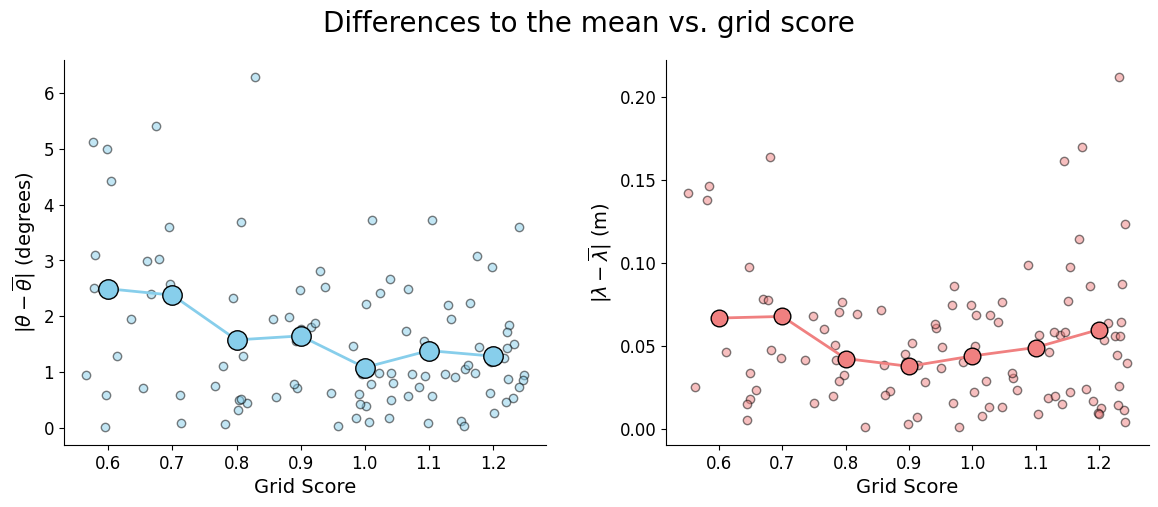

In [12]:
# plot the std deviation in orienation and spacing vs the grid score of every binb
bins = np.linspace(0.6, 1.2, 7)
digitized = np.digitize(filtered_score, bins)

mean_orientation = np.mean(filtered_orientation)
mean_spacing = np.mean(filtered_spacing)
# count how many cells in each bin
bin_counts = np.zeros_like(bins)
bin_delta_orientation = np.zeros_like(bins)
bin_delta_spacing = np.zeros_like(bins)

bin_orientations = []
bin_spacings = []
bin_delta_orientations = []
bin_delta_spacings = []
for i in range(1, len(bins)+1):
    bin_orientations.append(np.array(filtered_orientation)[digitized == i])
    bin_spacings.append(np.array(filtered_spacing)[digitized == i])

    bin_counts[i-1] = len(bin_orientations[-1])
    bin_delta_orientations.append(np.abs(bin_orientations[-1] - mean_orientation))
    bin_delta_spacings.append(np.abs(bin_spacings[-1] - mean_spacing))
    bin_delta_spacing[i-1] = np.abs(bin_spacings[-1] - mean_spacing).mean()
    bin_delta_orientation[i-1] = np.abs(bin_orientations[-1] - mean_orientation).mean()

# Create a figure with two subplots, one for orientation and one for spacing with x axis being grid score in a scatter plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# make some space between subplots
fig.subplots_adjust(wspace=0.25)
# set fig title
fig.suptitle('Differences to the mean vs. grid score', fontsize=20)

axes[0].plot(bins, bin_delta_orientation, color='skyblue', marker='o', markeredgecolor = 'black', linewidth=2, markersize=14)

for i in range(len(bins)):
    for x in bin_delta_orientations[i]:
        jitter = random.uniform(-0.05, 0.05)
        axes[0].scatter(bins[i] + jitter, x, color='skyblue', edgecolor='black', alpha=0.5)
axes[0].set_xlabel('Grid Score')
axes[0].set_ylabel(r'|$\theta - \overline{\theta} $| (degrees)')

axes[1].plot(bins, bin_delta_spacing, markeredgecolor = 'black',color='lightcoral', marker='o', linewidth=2, markersize=12)
for i in range(len(bins)):
    for x in bin_delta_spacings[i]:
        jitter = random.uniform(-0.05, 0.05)
        axes[1].scatter(bins[i] + jitter, x, color='lightcoral', edgecolor='black', alpha=0.5)
axes[1].set_xlabel('Grid Score')
axes[1].set_ylabel(r'|$\lambda - \overline{\lambda} $| (m)')


for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    # remove top and right splines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# plt.savefig(session_results_directory + '/' + rat + mod +  '_variance_vs_grid_score.png', dpi=300)

# Reliability of cells

To see how reliable a cell we can look at the average delta between odd and even and plot it against the grid score

In [107]:
mean_delta_orientation = []
mean_delta_spacing = []
grid_score = []

for cell in cell_trial_dict:
    grid_score.append(G.grid_scores[int(cell)])
    delta_orientation = []
    delta_spacing = []
    for trial in cell_trial_dict[cell]:
        delta_orientation.append(cell_trial_dict[cell][trial]['orientation_even'] - cell_trial_dict[cell][trial]['orientation_odd'])
        delta_spacing.append(cell_trial_dict[cell][trial]['spacing_even'] - cell_trial_dict[cell][trial]['spacing_odd'])
    mean_delta_orientation.append(np.mean(delta_orientation))
    mean_delta_spacing.append(np.mean(delta_spacing))
    
mean_delta_spacing = np.array(mean_delta_spacing)
mean_delta_orientation = np.array(mean_delta_orientation)
grid_score = np.array(grid_score)

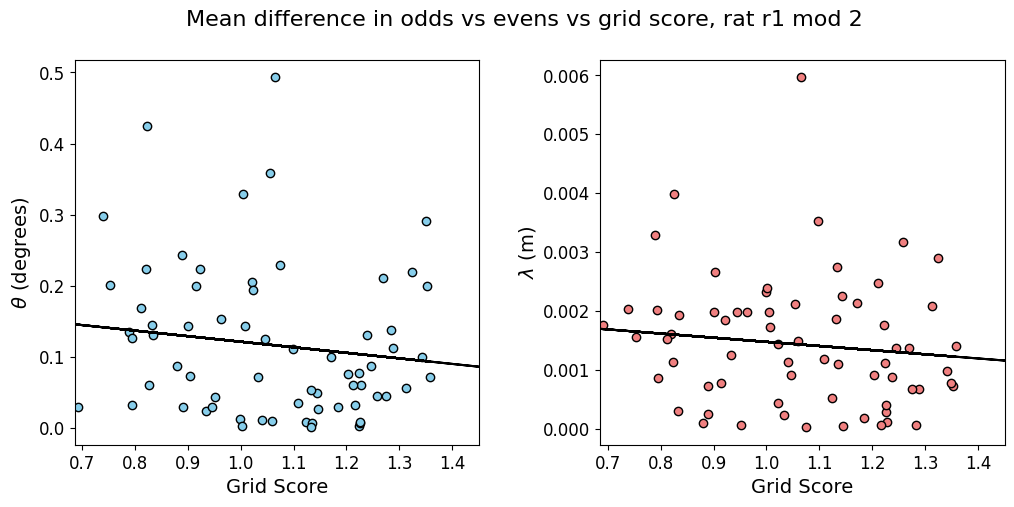

In [109]:
# Create a figure with two subplots, one for orientation and one for spacing with x axis being grid score in a scatter plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# make the subplots space out a bit
plt.subplots_adjust(wspace=0.3)
plt.suptitle('Mean difference in odds vs evens vs grid score, rat ' + rat + ' mod ' + mod, fontsize = 16)

axes[0].scatter(grid_score, abs(mean_delta_orientation), color='skyblue', edgecolor='black')
axes[0].set_xlabel('Grid Score')
axes[0].set_ylabel(r'$\theta$ (degrees)')
axes[0].set_xlim(np.percentile(grid_score, 1), np.percentile(grid_score, 99))

m, b = np.polyfit(grid_score, abs(mean_delta_orientation), 1)
axes[0].plot(grid_score, m*grid_score + b, color='black')

axes[1].scatter(grid_score, abs(np.array(mean_delta_spacing)), color='lightcoral', edgecolor='black')
axes[1].set_xlabel('Grid Score')
axes[1].set_ylabel(r'$\lambda$ (m)')
axes[1].set_xlim(np.percentile(grid_score, 1), np.percentile(grid_score, 99))

m, b = np.polyfit(grid_score, abs(mean_delta_spacing), 1)
axes[1].plot(grid_score, m*grid_score + b, color='black')
# set all labels to fontsize 14
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)

plt.savefig(session_results_directory + '/' + rat + mod +  '2_mean_difference_odds_evens', dpi=300)